In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import SGDClassifier

In [3]:
train_df = pd.read_csv("/kaggle/input/students-drop-out-prediction/train.csv")
test_df = pd.read_csv("/kaggle/input/students-drop-out-prediction/test.csv")

In [4]:
train_df.sample(10)

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
2196,2196,3,89,10,100,1,1,16,181,251,...,-0.8,-3.12,5,65,10,25,32,36,1,0
1822,1822,33,116,10,52,1,12,16,181,251,...,2.8,-4.06,2,72,29,29,10,53,3,1
1315,1315,9,15,11,109,1,3,18,118,13,...,5.6,8.32,4,33,6,7,16,67,5,1
712,712,3,89,10,148,1,1,16,183,251,...,1.4,3.51,4,40,19,28,43,53,1,1
3273,3273,3,6,10,17,1,1,16,110,6,...,1.4,1.74,8,14,22,16,14,15,2,2
1638,1638,4,95,14,158,1,9,23,184,285,...,0.2,1.88,7,29,48,30,3,72,6,2
2468,2468,3,89,15,148,1,1,16,1,154,...,-0.8,-3.12,5,18,33,32,1,53,0,1
1268,1268,3,116,10,155,1,1,16,1,168,...,1.4,1.74,0,37,22,9,32,4,0,1
2732,2732,3,6,14,102,1,1,16,110,168,...,-0.3,0.79,9,46,44,19,53,34,4,1
1661,1661,3,116,10,55,1,1,16,183,278,...,1.4,1.74,0,42,15,23,38,61,4,1


In [5]:
train_df.shape

(3796, 43)

In [6]:
# No null values in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

In [7]:
# Univariate analysis
binary_col_names = ["v_1", "v_26", "v_11", "v_14", "v_30", "v_28", "v_9", "v_27", "label"]
non_binary_col_names = list(set(train_df.columns) - set(binary_col_names) - set(["id"]))

array([[<AxesSubplot:title={'center':'v_1'}>],
       [<AxesSubplot:title={'center':'v_26'}>],
       [<AxesSubplot:title={'center':'v_11'}>],
       [<AxesSubplot:title={'center':'v_14'}>],
       [<AxesSubplot:title={'center':'v_30'}>],
       [<AxesSubplot:title={'center':'v_28'}>],
       [<AxesSubplot:title={'center':'v_9'}>],
       [<AxesSubplot:title={'center':'v_27'}>],
       [<AxesSubplot:title={'center':'label'}>]], dtype=object)

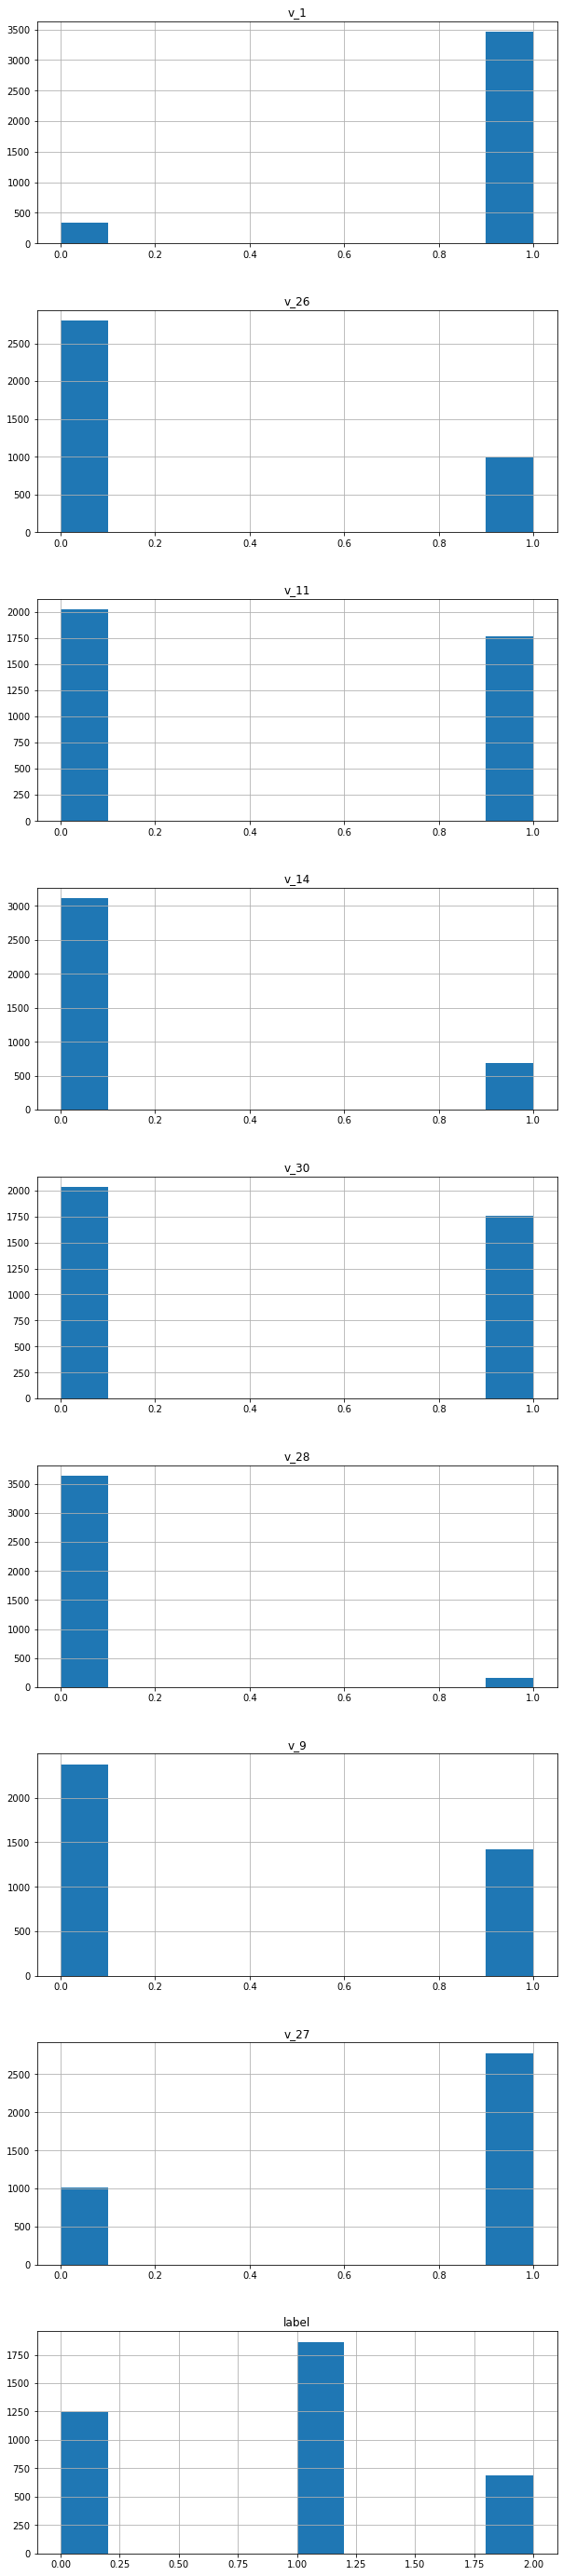

In [8]:
# Binary features
train_df.hist(column=binary_col_names, layout=(len(binary_col_names),1), figsize=(10,50))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


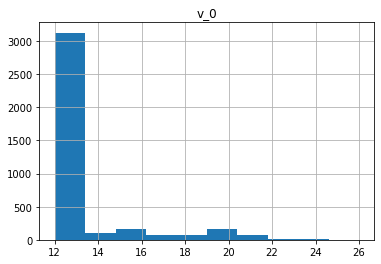

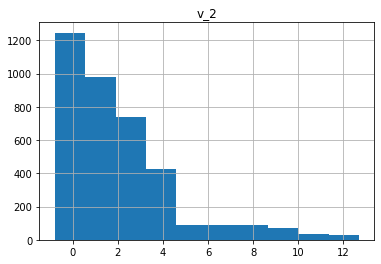

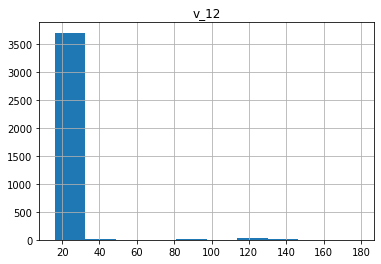

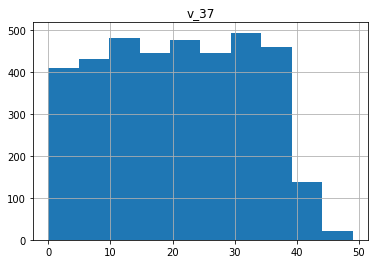

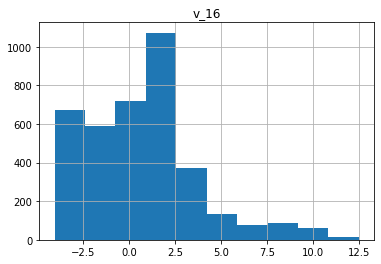

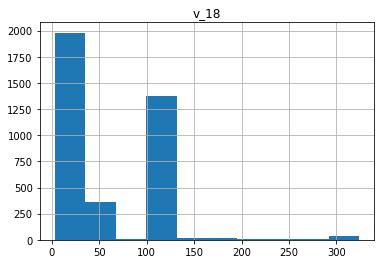

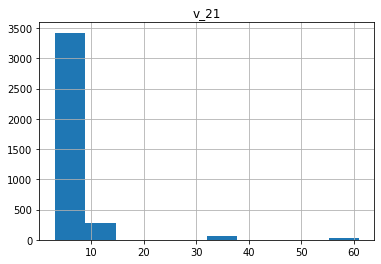

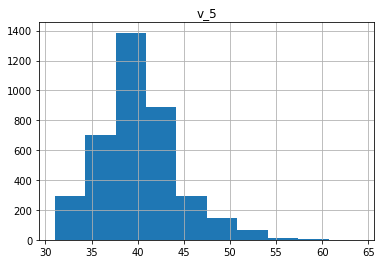

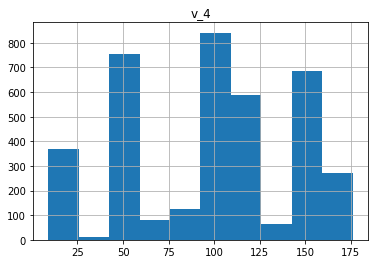

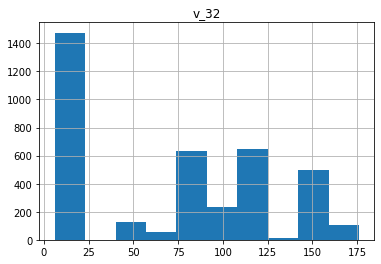

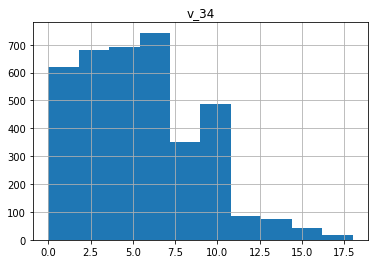

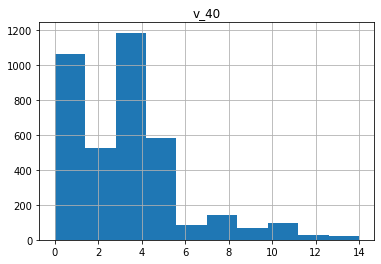

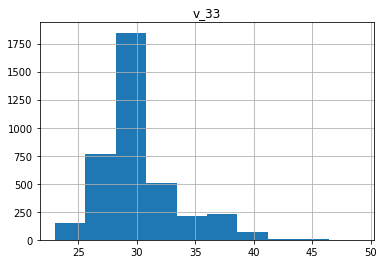

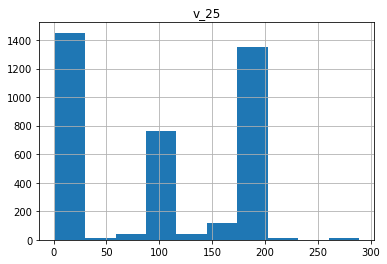

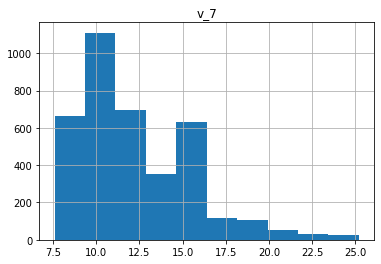

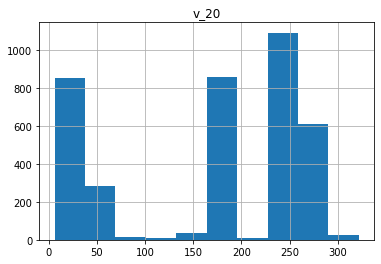

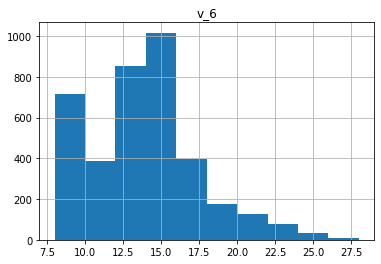

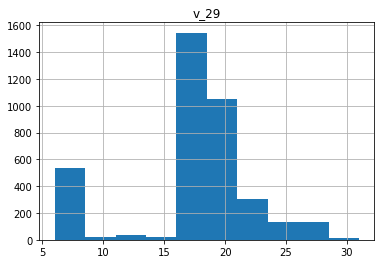

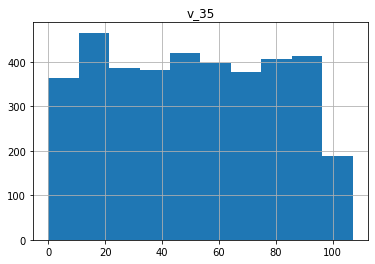

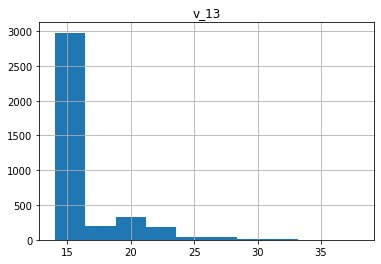

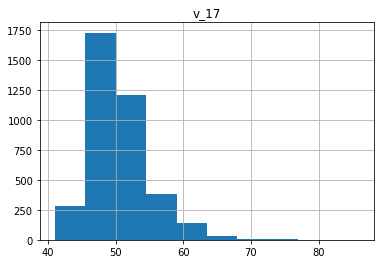

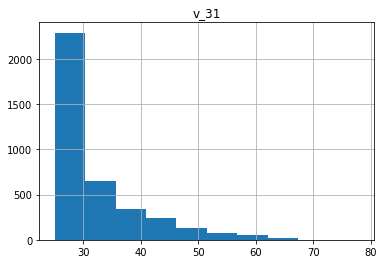

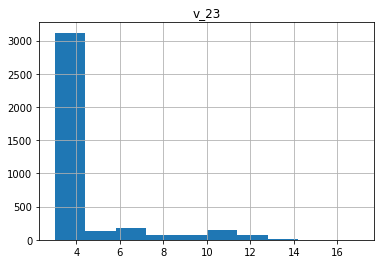

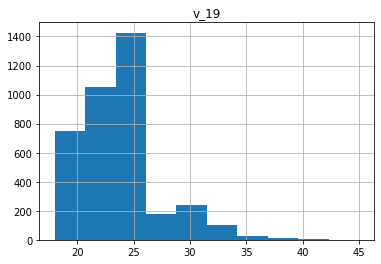

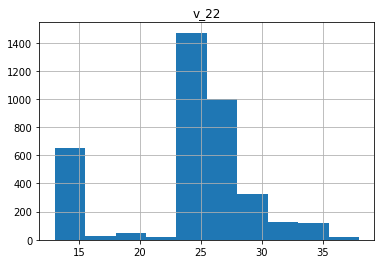

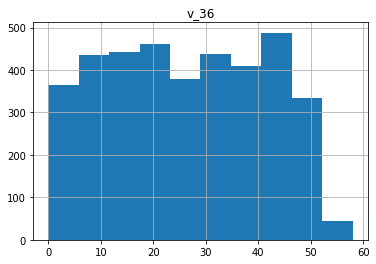

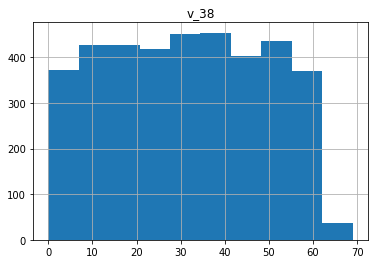

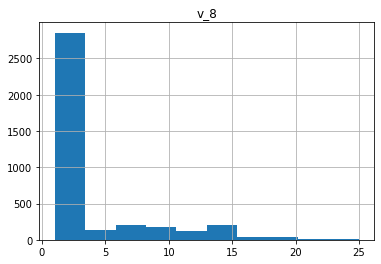

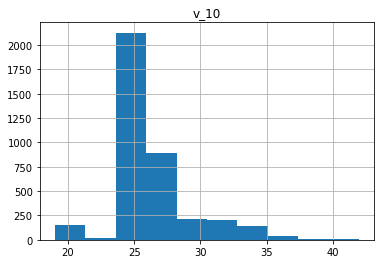

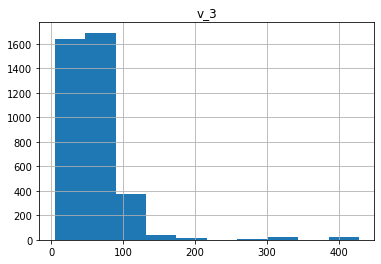

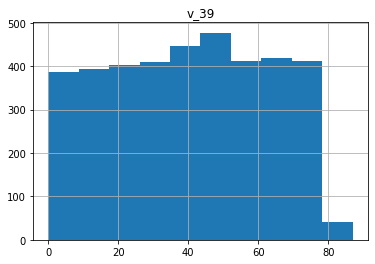

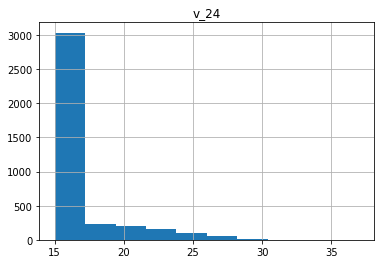

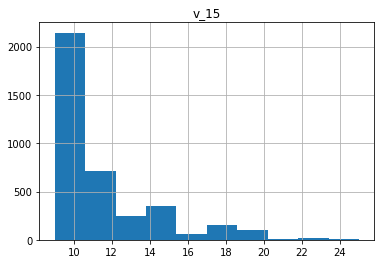

In [9]:
# Non binary features
for col in non_binary_col_names:
    train_df.hist(column=col)

In [10]:
# We do not need 'id' column
# Scale non binary features
transform_pipeline = ColumnTransformer(
    [
        ("drop_id", "drop", ["id"]),
        ("scale_non_binary", StandardScaler(), non_binary_col_names)
    ],
    remainder="passthrough"
)
transform_train_data = transform_pipeline.fit_transform(train_df)
feature_names = [name.split("__")[1] for name in transform_pipeline.get_feature_names_out()]
transform_train_df = pd.DataFrame(data=transform_train_data, columns=feature_names)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


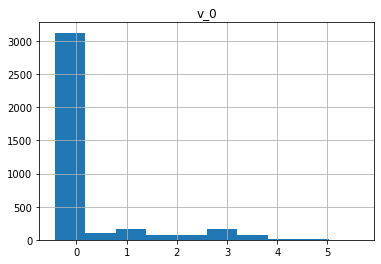

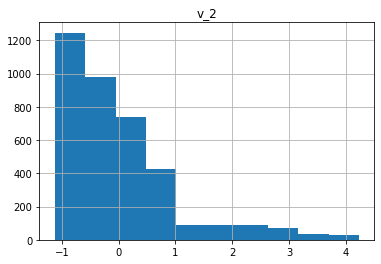

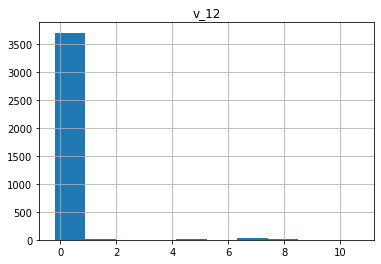

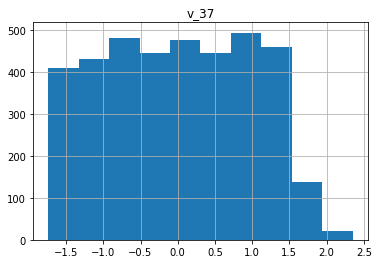

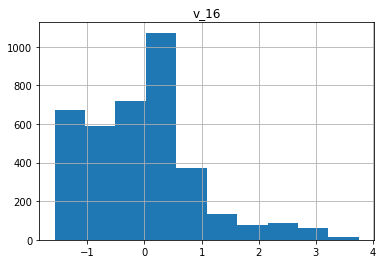

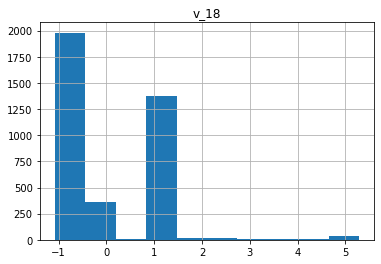

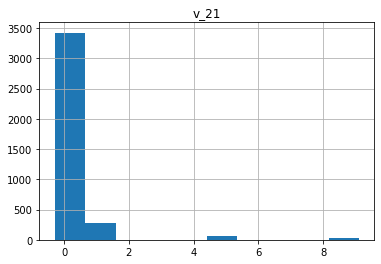

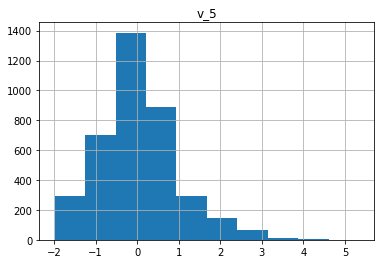

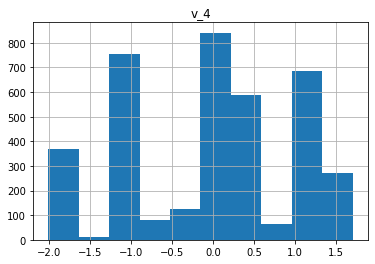

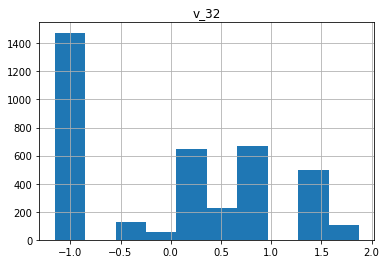

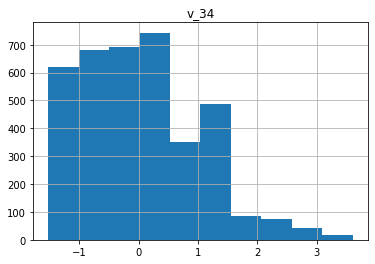

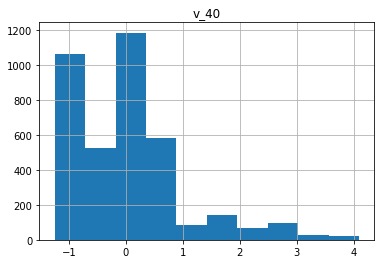

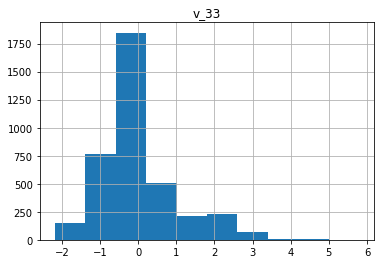

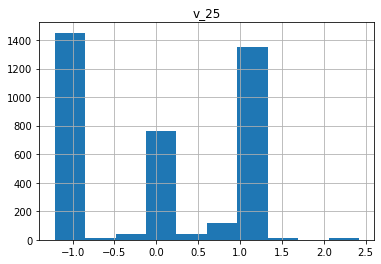

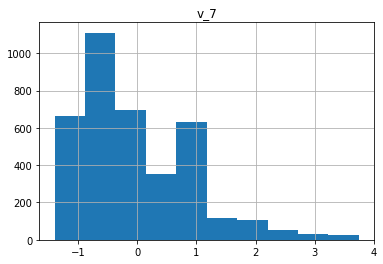

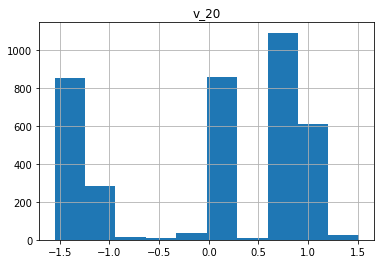

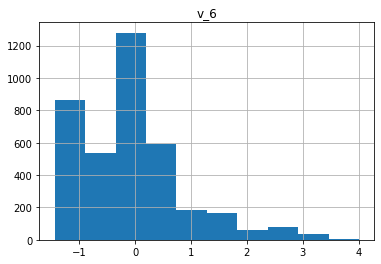

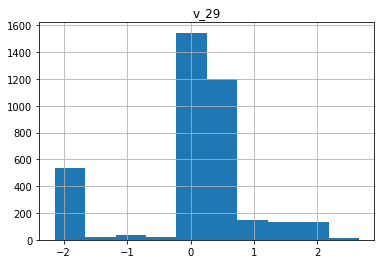

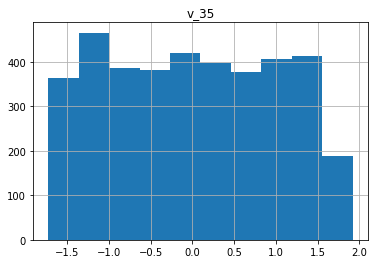

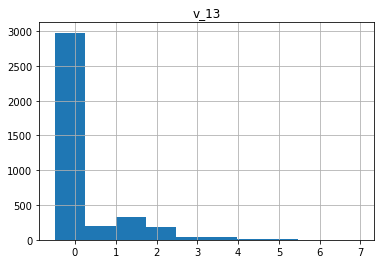

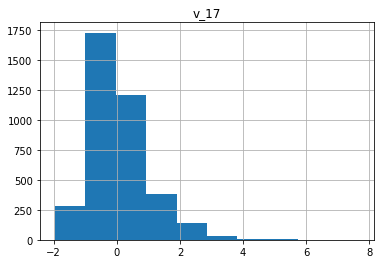

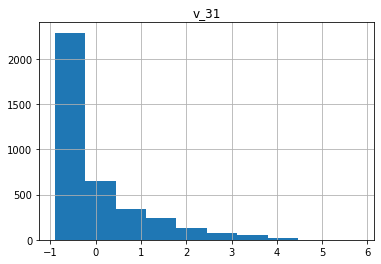

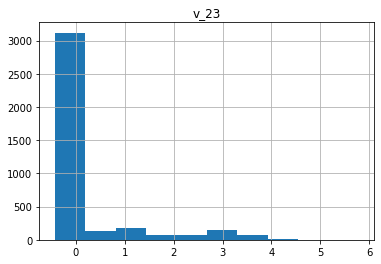

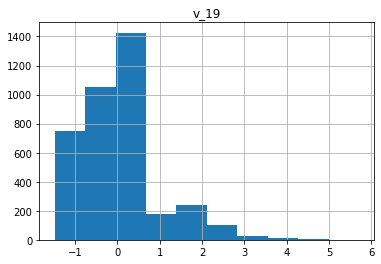

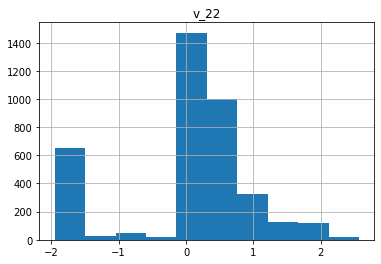

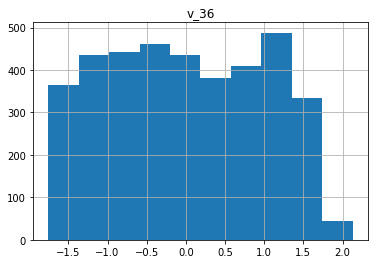

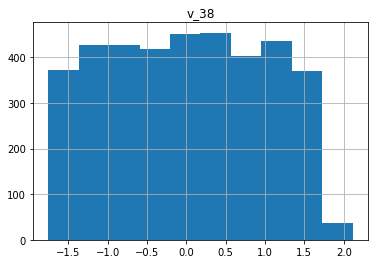

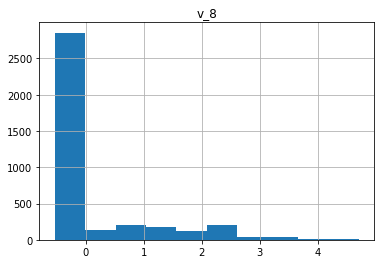

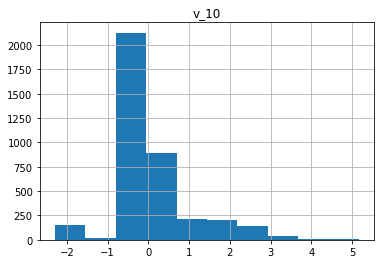

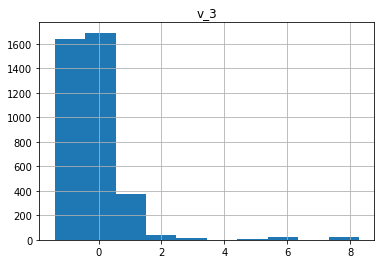

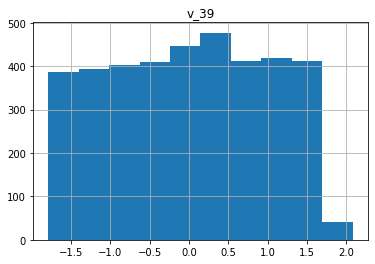

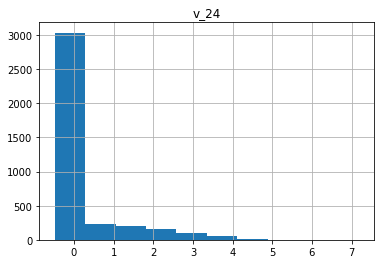

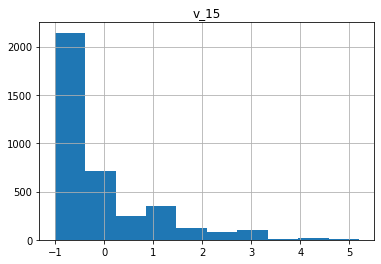

In [11]:
# Non binary features
for col in non_binary_col_names:
    transform_train_df.hist(column=col)

<AxesSubplot:ylabel='Frequency'>

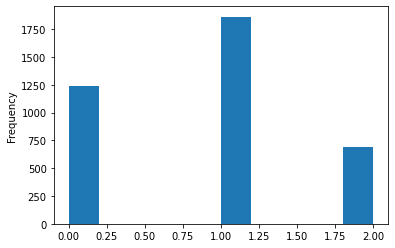

In [12]:
# There is some class imbalance
transform_train_df["label"].plot.hist()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


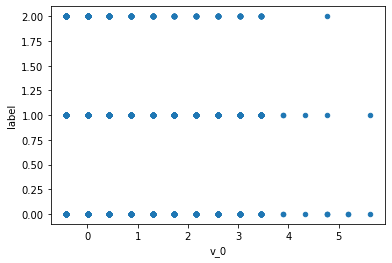

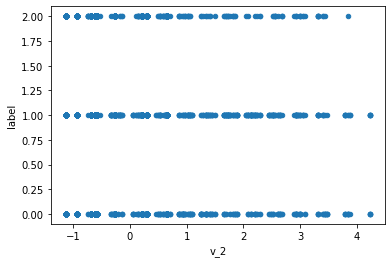

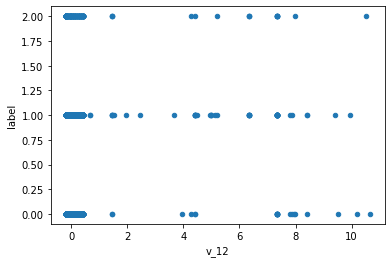

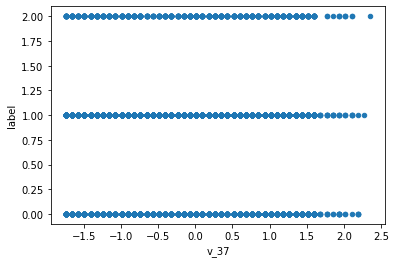

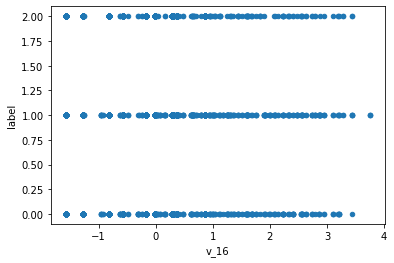

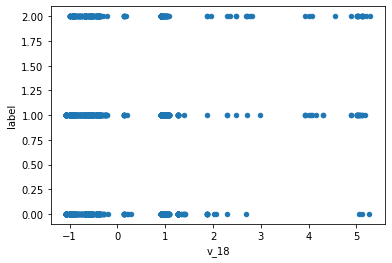

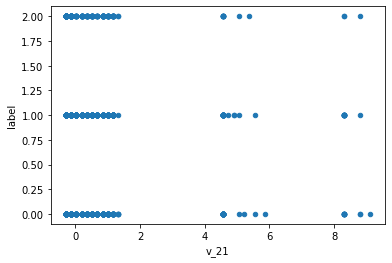

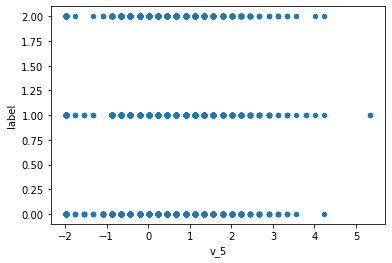

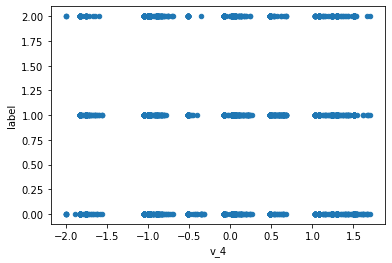

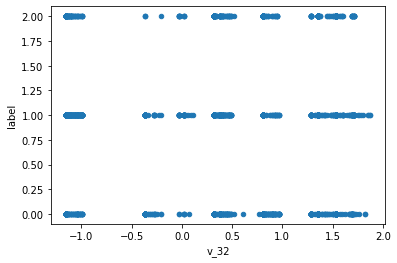

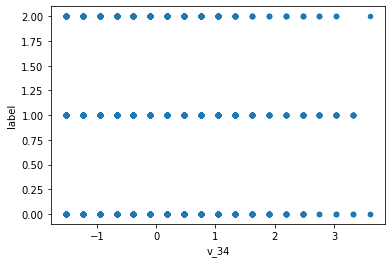

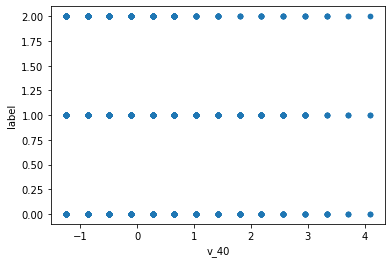

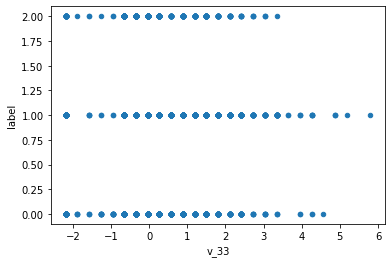

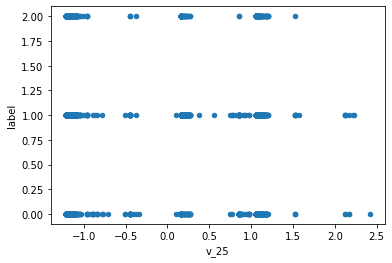

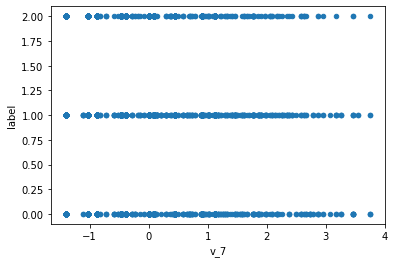

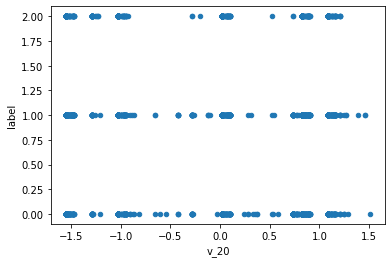

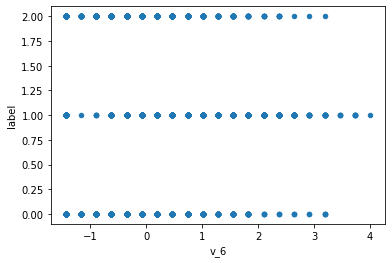

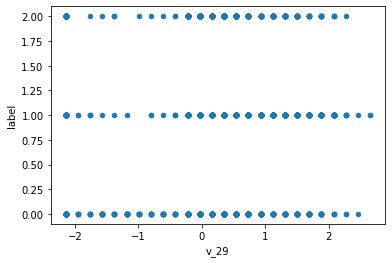

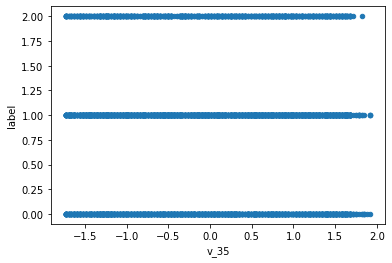

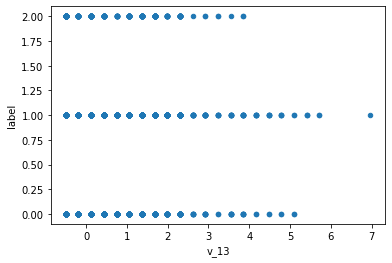

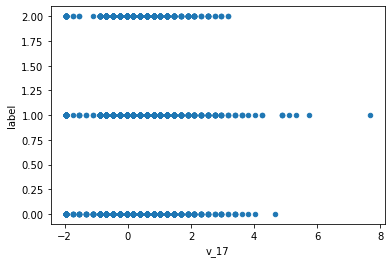

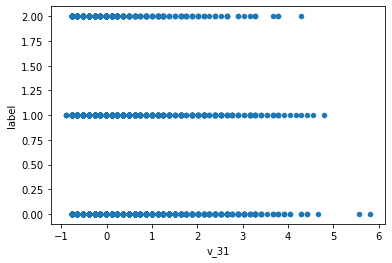

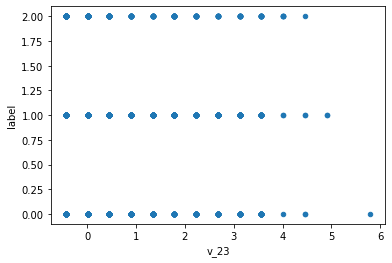

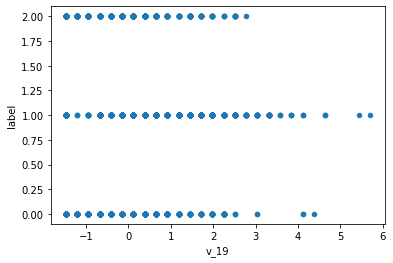

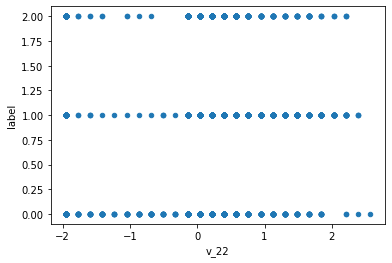

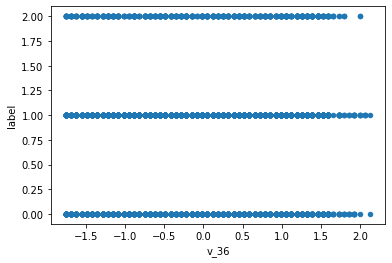

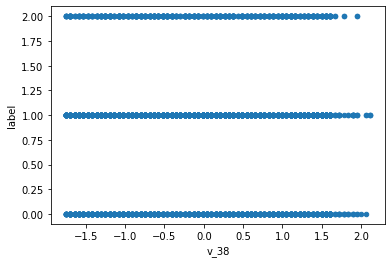

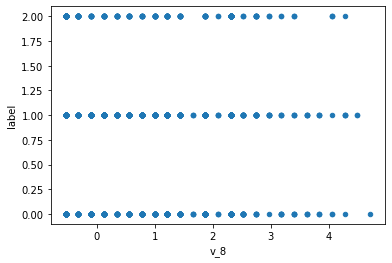

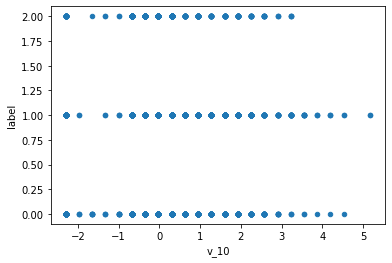

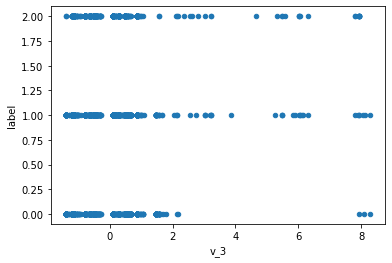

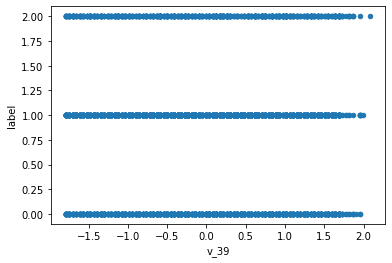

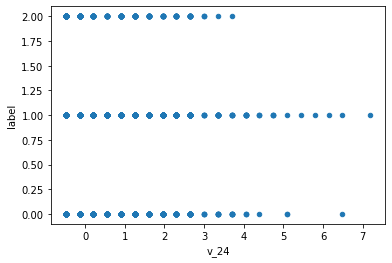

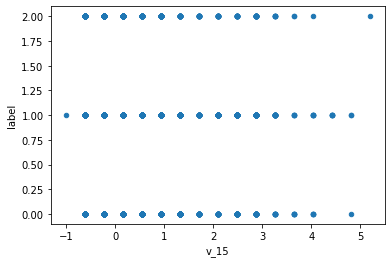

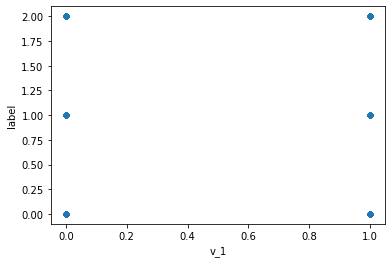

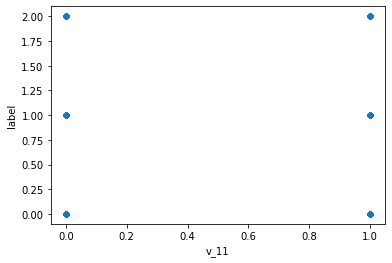

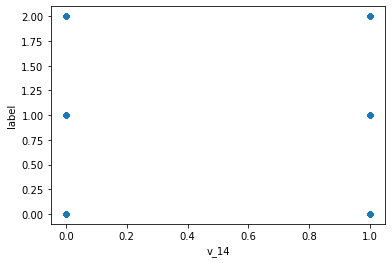

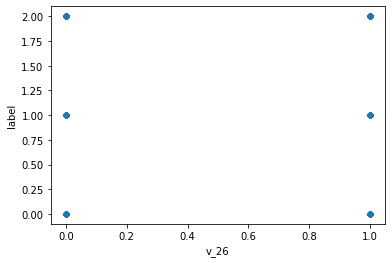

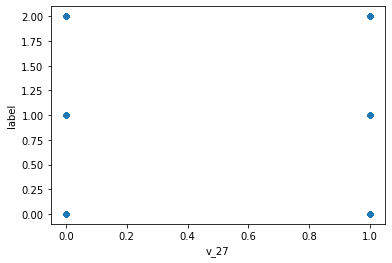

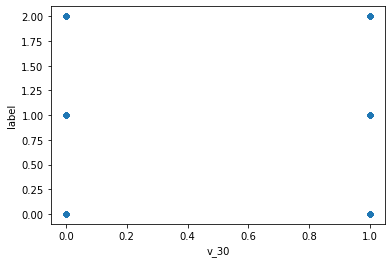

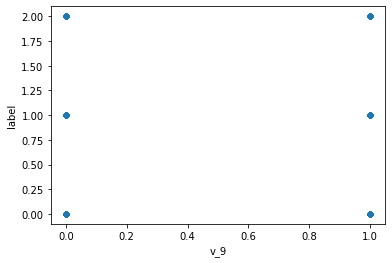

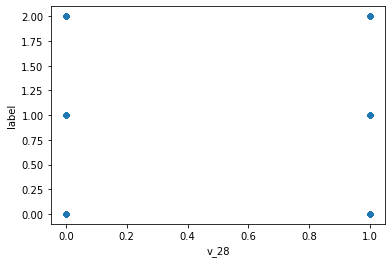

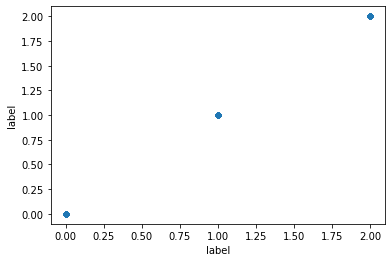

In [13]:
# Bivariate analysis
for col in transform_train_df.columns:
    transform_train_df.plot.scatter(x=col, y="label")

In [14]:
y_train_com = transform_train_df.pop("label")
X_train_com = transform_train_df

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_com, y_train_com, test_size=0.3, random_state=1)

## Build linear models

In [16]:
# Dummy Classifier (most frequent)
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
preds = dummy_model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       375
         1.0       0.47      1.00      0.64       540
         2.0       0.00      0.00      0.00       224

    accuracy                           0.47      1139
   macro avg       0.16      0.33      0.21      1139
weighted avg       0.22      0.47      0.30      1139



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Logisitc Regression, Ridge
model = SGDClassifier(random_state=1, loss="log", penalty="l2")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       375
         1.0       0.75      0.90      0.82       540
         2.0       0.49      0.27      0.35       224

    accuracy                           0.72      1139
   macro avg       0.66      0.63      0.63      1139
weighted avg       0.70      0.72      0.70      1139



In [18]:
# Logisitc Regression, Lasso
model = SGDClassifier(random_state=1, loss="log", penalty="l1")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       375
         1.0       0.74      0.90      0.82       540
         2.0       0.55      0.23      0.32       224

    accuracy                           0.72      1139
   macro avg       0.67      0.63      0.62      1139
weighted avg       0.70      0.72      0.69      1139



In [19]:
# Logisitc Regression, Elasticnet
model = SGDClassifier(random_state=1, loss="log", penalty="elasticnet")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       375
         1.0       0.74      0.93      0.83       540
         2.0       0.62      0.24      0.34       224

    accuracy                           0.73      1139
   macro avg       0.70      0.64      0.64      1139
weighted avg       0.72      0.73      0.70      1139



In [20]:
# Perceptron, Elasticnet
model = SGDClassifier(random_state=1, loss="perceptron", penalty="elasticnet")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72       375
         1.0       0.75      0.78      0.77       540
         2.0       0.39      0.48      0.43       224

    accuracy                           0.68      1139
   macro avg       0.65      0.64      0.64      1139
weighted avg       0.70      0.68      0.68      1139



In [21]:
# Linear SVM, Elasticnet
model = SGDClassifier(random_state=1, loss="hinge", penalty="elasticnet")
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       375
         1.0       0.74      0.88      0.80       540
         2.0       0.55      0.29      0.38       224

    accuracy                           0.71      1139
   macro avg       0.67      0.63      0.64      1139
weighted avg       0.69      0.71      0.69      1139



In [22]:
# Polynomial features (degree=2, including interaction) + Logistic Regression + Elasticnet

transform_pipeline_poly = ColumnTransformer(
    [
        ("drop_id", "drop", ["id"]),
        ("scale_non_binary", StandardScaler(), non_binary_col_names),
        ("poly_non_binary", PolynomialFeatures(2), non_binary_col_names)
    ],
    remainder="passthrough"
)
transform_train_data_poly = transform_pipeline_poly.fit_transform(train_df)
feature_names = [name.split("__")[1] for name in transform_pipeline_poly.get_feature_names_out()]
transform_train_df_poly = pd.DataFrame(data=transform_train_data_poly, columns=feature_names)

y_train_com_poly = transform_train_df_poly.pop("label")
X_train_com_poly = transform_train_df_poly

X_train_poly, X_valid_poly, y_train_poly, y_valid_poly = train_test_split(X_train_com_poly, y_train_com_poly, test_size=0.3, random_state=1)

model = SGDClassifier(random_state=1, loss="log", penalty="elasticnet")
model.fit(X_train_poly, y_train_poly)
preds = model.predict(X_valid_poly)
print(classification_report(y_valid_poly, preds))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       375
         1.0       0.76      0.80      0.78       540
         2.0       0.38      0.31      0.34       224

    accuracy                           0.68      1139
   macro avg       0.61      0.61      0.61      1139
weighted avg       0.66      0.68      0.67      1139



In [23]:
# Polynomial features (degree=2, no interaction) + Logistic Regression + Elasticnet
X_train_com_poly = np.hstack((X_train_com[non_binary_col_names]**(i+1) for i in range(2)))
X_train_com_poly = np.hstack([np.ones((X_train_com.shape[0], 1)), X_train_com_poly, X_train_com[set(binary_col_names) - set(["label"])]])
X_train_poly, X_valid_poly, y_train_poly, y_valid_poly = train_test_split(X_train_com_poly, y_train_com, test_size=0.3, random_state=1)
model = SGDClassifier(random_state=1, loss="log", penalty="elasticnet")
model.fit(X_train_poly, y_train_poly)
preds = model.predict(X_valid_poly)
print(classification_report(y_valid_poly, preds))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70       375
         1.0       0.78      0.79      0.79       540
         2.0       0.43      0.33      0.37       224

    accuracy                           0.68      1139
   macro avg       0.62      0.62      0.62      1139
weighted avg       0.67      0.68      0.68      1139



In [24]:
# Polynomial features (degree=3, no interaction) + Logistic Regression + Elasticnet
X_train_com_poly = np.hstack((X_train_com[non_binary_col_names]**(i+1) for i in range(3)))
X_train_com_poly = np.hstack([np.ones((X_train_com.shape[0], 1)), X_train_com_poly, X_train_com[set(binary_col_names) - set(["label"])]])
X_train_poly, X_valid_poly, y_train_poly, y_valid_poly = train_test_split(X_train_com_poly, y_train_com, test_size=0.3, random_state=1)
model = SGDClassifier(random_state=1, loss="log", penalty="elasticnet")
model.fit(X_train_poly, y_train_poly)
preds = model.predict(X_valid_poly)
print(classification_report(y_valid_poly, preds))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68       375
         1.0       0.73      0.81      0.77       540
         2.0       0.39      0.32      0.35       224

    accuracy                           0.66      1139
   macro avg       0.61      0.60      0.60      1139
weighted avg       0.65      0.66      0.66      1139



## Till now, the best combination is
- degree = 1
- Logistic Regression
- Elasticnet regularization

With weighted average F-score = 0.64

## Now we proceed to perform Hyper parameter tuning of this model

In [25]:
param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "learning_rate": ["optimal", "invscaling", "adaptive"],
    "eta0": [1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"]
}
model = SGDClassifier(random_state=1, loss="log", penalty="elasticnet")
search = GridSearchCV(model, param_grid=param_grid, scoring="f1_macro", refit=True, cv=5)
search.fit(X_train_com, y_train_com)

GridSearchCV(cv=5,
             estimator=SGDClassifier(loss='log', penalty='elasticnet',
                                     random_state=1),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'eta0': [1, 10, 100],
                         'learning_rate': ['optimal', 'invscaling', 'adaptive'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_macro')

In [26]:
search.best_params_

{'alpha': 0.0001, 'eta0': 1, 'learning_rate': 'optimal', 'penalty': 'l1'}

In [27]:
search.best_score_

0.6312264268310178

### Generate predictions on test data and submit

In [ ]:
# We do not need 'id' column
# Scale non binary features
transform_test_data = transform_pipeline.fit_transform(test_df)
feature_names = [name.split("__")[1] for name in transform_pipeline.get_feature_names_out()]
transform_test_df = pd.DataFrame(data=transform_test_data, columns=feature_names)
preds = [int(i) for i in search.predict(transform_test_df)]
submission = pd.DataFrame({"id": test_df["id"].to_numpy(), "label": preds})
submission.to_csv("submission.csv", index=False)